#### Загрузка и анализ данных

In [11]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X.head())
print("\nКлассы:", data.target_names)
print(len(y))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

#### Предобработка данных

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Разделение на train/test

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#### Обучение моделей

##### Логистическая регрессия

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

##### SVM

In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

##### Дерево решений

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

#### Оценка качества моделей

In [7]:
from sklearn.metrics import accuracy_score, f1_score

models = {"Logistic Regression": log_reg, "SVM": svm, "Decision Tree": tree}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"  F1-score: {f1_score(y_test, y_pred, average='macro'):.3f}\n")

Logistic Regression:
  Accuracy: 1.000
  F1-score: 1.000

SVM:
  Accuracy: 1.000
  F1-score: 1.000

Decision Tree:
  Accuracy: 0.944
  F1-score: 0.943



#### Важность признаков в дереве решений

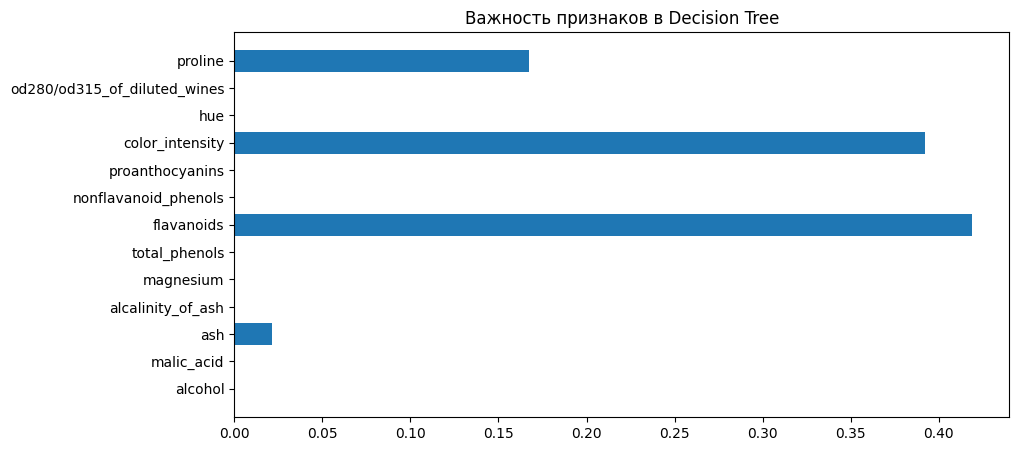

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(data.feature_names, tree.feature_importances_)
plt.title("Важность признаков в Decision Tree")
plt.show()

#### Визуализация дерева решений

##### График

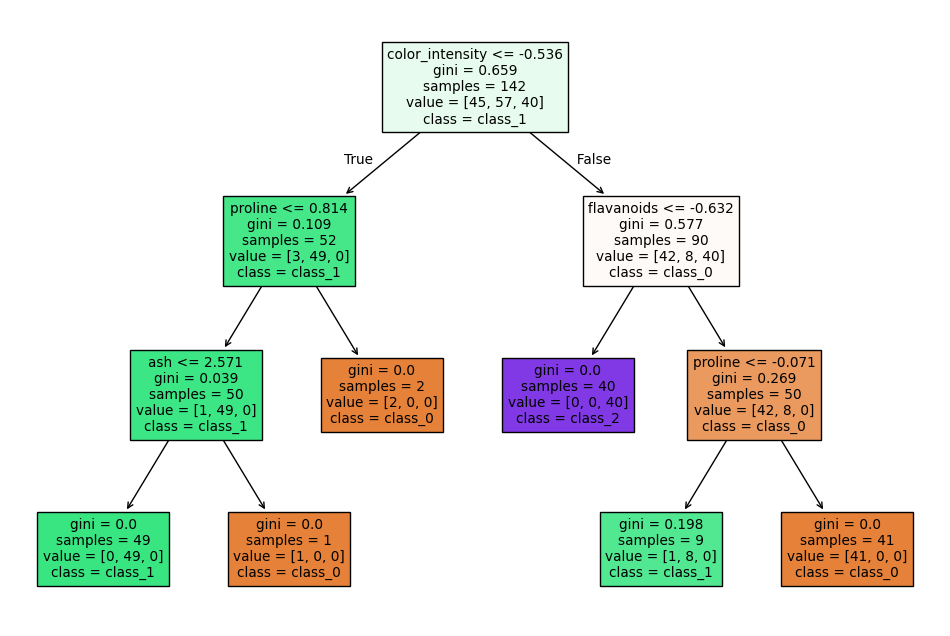

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

##### Текстовые правила

In [10]:
from sklearn.tree import export_text

rules = export_text(tree, feature_names=list(data.feature_names))
print(rules)

|--- color_intensity <= -0.54
|   |--- proline <= 0.81
|   |   |--- ash <= 2.57
|   |   |   |--- class: 1
|   |   |--- ash >  2.57
|   |   |   |--- class: 0
|   |--- proline >  0.81
|   |   |--- class: 0
|--- color_intensity >  -0.54
|   |--- flavanoids <= -0.63
|   |   |--- class: 2
|   |--- flavanoids >  -0.63
|   |   |--- proline <= -0.07
|   |   |   |--- class: 1
|   |   |--- proline >  -0.07
|   |   |   |--- class: 0



Результат можно улучшить, добавив кросс-валидацию или подбор гиперпараметров.